# Dataset imagenes MNIST

In [17]:
import tensorflow as tf
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [18]:
mnist = tf.keras.datasets.mnist

In [19]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [20]:
X_train.shape

(60000, 28, 28)

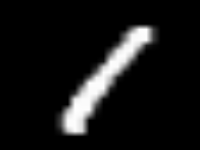

In [21]:
cv2_imshow(cv2.resize(X_train[3], (200,150)))

In [22]:
y_train[3]

1

In [23]:
X_test.shape

(10000, 28, 28)

# Dataset de caracteristicas con HOG FESTURES + ONEHOT LABELS

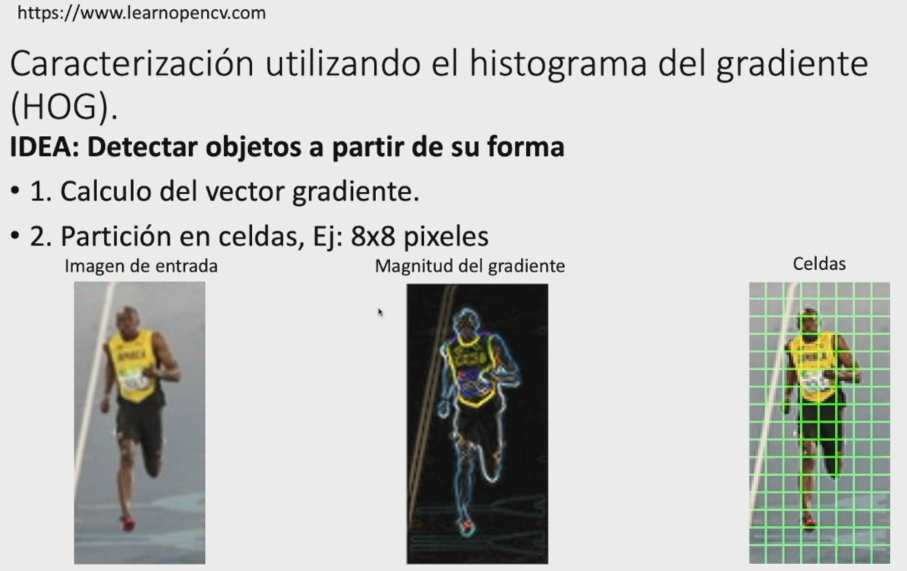

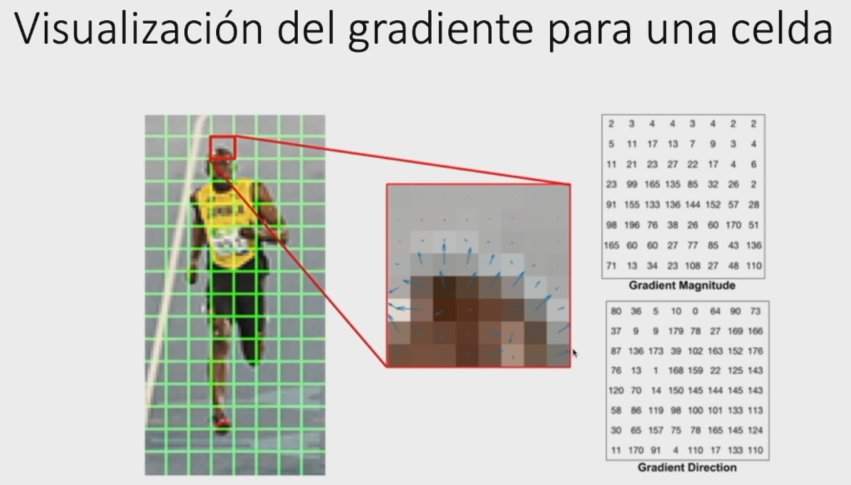

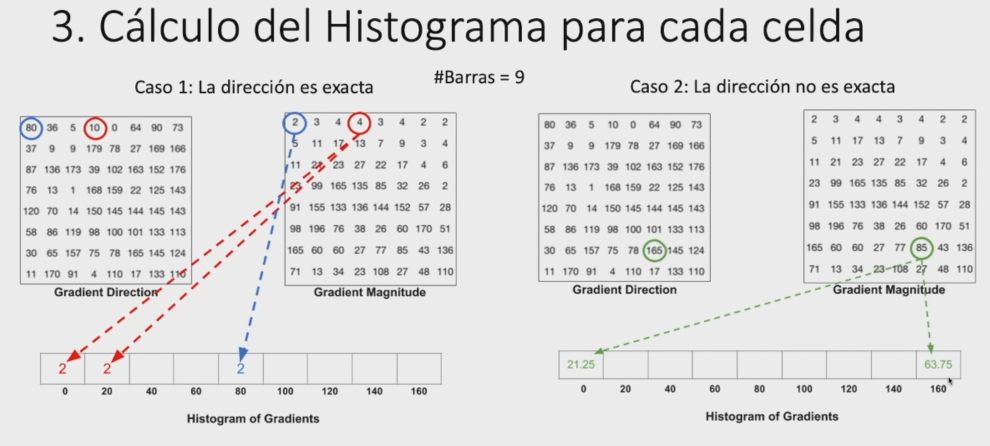

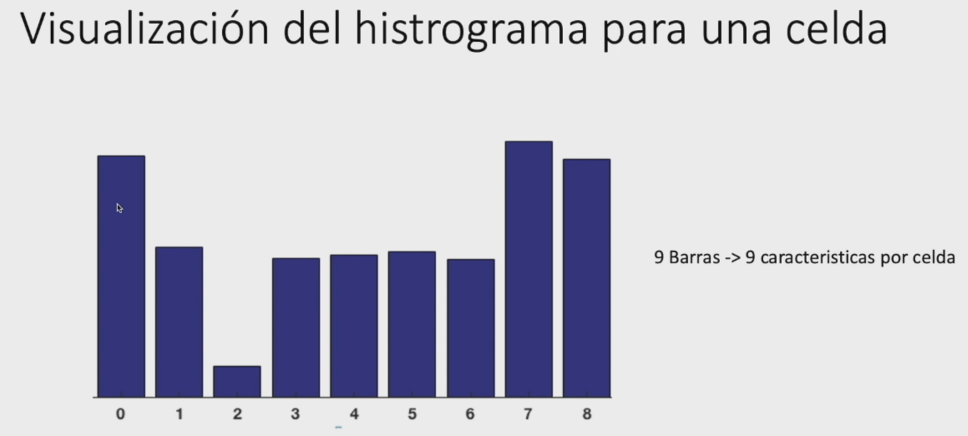

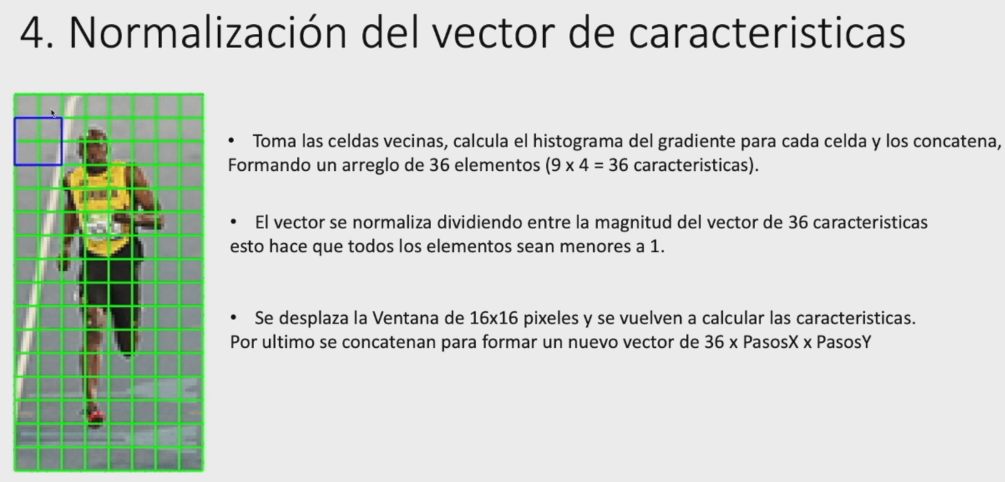

In [24]:
img = X_train[1]
winSize = img.shape # tmaño de la imagen
blockSize = (8,8) # partir en bloques de 8x8
blockStride = (2,2) # desplazamiento o salto de 2 en 2
cellSize = (4,4) # tamaño de la ventana
nbins = 9 # cantidad de barras o frecuencias q se cuentan

hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins)
hog.compute(img).shape

(4356,)

* Crear una funcion que a partir de una imagen capture las caracteristicas

In [25]:
def get_hog():
  winSize = img.shape # tmaño de la imagen
  blockSize = (8,8) # partir en bloques de 8x8
  blockStride = (2,2) # desplazamiento o salto de 2 en 2
  cellSize = (4,4) # tamaño de la ventana
  nbins = 9 # cantidad de barras o frecuencias q se cuentan

  hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins)
  return hog
hog.compute(img).shape

(4356,)

In [26]:
img = X_train[1]
hog = get_hog()
hog.compute(img).shape

(4356,)

In [27]:
festures_train = []
for img in X_train:
  festures_train.append(hog.compute(img)) # extraemos las caracteristicas calculadas

festures_train = np.array(festures_train)# convertir a arreglo de numpy
#festures_train = festures_train[:,:,0] aplicar esto en caso devuelva como un tensor (60000, 4356,1)
festures_train.shape

(60000, 4356)

In [28]:
def get_features(x):
  features = []

  for img in x:
    features.append(hog.compute(img))
  
  features = np.array(features)
  #features = features[:,:,0]
  return features


In [29]:
features_train = get_features(X_train)
features_test = get_features(X_test)

In [30]:
features_train.shape

(60000, 4356)

In [31]:
features_test.shape

(10000, 4356)

* aplicar onehot con tf [3] -> [0,0,0,1,0,0,0]

In [32]:
y_trainOneHot = tf.one_hot(y_train, np.max(y_train)+1)
y_testOneHot = tf.one_hot(y_test, np.max(y_train)+1)

In [33]:
y_trainOneHot[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)>

In [34]:
y_trainOneHot

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)>

* Definir la red neuronal

In [35]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [36]:
def classifier():
  input_dimensions = features_train.shape[1]
  model = Sequential()
  model.add(Dense(200, input_dim = input_dimensions, activation="relu",name="Layer1"))
  model.add(Dense(150, activation="relu",name="Layer2"))
  model.add(Dense(100, activation="relu",name="Layer3"))
  model.add(Dense(10, activation="softmax",name="Layer4"))

  # model.compile(loss="categorical_crossentropy", 
  #               optimizer = keras.optimizers.SGD(learning_rate = 1e-3)) #optimizer = "adams"
  model.compile(loss='categorical_crossentropy', optimizer='adam')
  return model


In [37]:
# OTRA FORMA DE CREAR EL MODLO
# # Define Sequential model with 3 layers
# model = keras.Sequential(
#     [
#         Dense(2, activation="relu", name="layer1"),
#         Dense(3, activation="relu", name="layer2"),
#         Dense(4, name="layer3"),
#     ]
# )
# # Call model on a test input
# x = tf.ones((3, 3))
# y = model(x)


In [38]:
model = classifier()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer1 (Dense)              (None, 200)               871400    
                                                                 
 Layer2 (Dense)              (None, 150)               30150     
                                                                 
 Layer3 (Dense)              (None, 100)               15100     
                                                                 
 Layer4 (Dense)              (None, 10)                1010      
                                                                 
Total params: 917,660
Trainable params: 917,660
Non-trainable params: 0
_________________________________________________________________


* Entrenar el modelo

In [39]:
hist_model = model.fit(features_train, y_trainOneHot, epochs=20, batch_size=50)

Epoch 1/20
1200/1200 [==============================] - 10s 3ms/step - loss: 0.1044
Epoch 2/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0465
Epoch 3/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0355
Epoch 4/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0287
Epoch 5/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0233
Epoch 6/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0202
Epoch 7/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0170
Epoch 8/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0146
Epoch 9/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0118
Epoch 10/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0124
Epoch 11/20
1200/1200 [==============================] - 8s 6ms/step - loss: 0.0108
Epoch 12/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0114


In [40]:
pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

313/313 [==============================] - 1s 2ms/step


In [41]:
pred_train[1]

array([1.0000000e+00, 3.4237155e-26, 1.8787474e-27, 1.2668644e-24,
       1.1202959e-25, 2.4738803e-31, 1.0324781e-18, 3.1979164e-28,
       3.7331639e-24, 4.3856757e-23], dtype=float32)

* Calculo de la matriz de cnfusion

In [42]:
y_pred_train = np.array(pred_train).argmax(axis=1) # aplicar para todo sobre el eje y
y_pred_test = np.array(pred_test).argmax(axis=1)

In [43]:
y_pred_train

array([5, 0, 4, ..., 5, 6, 8])

In [46]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

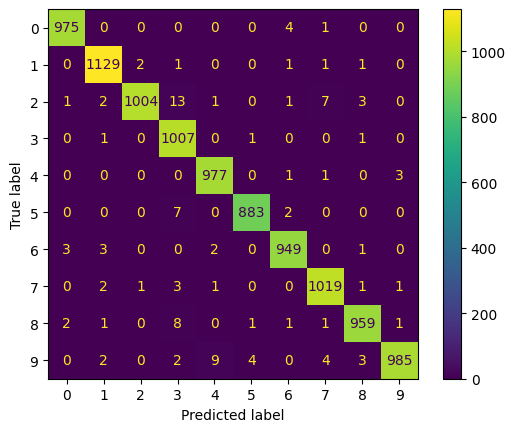

In [48]:
cm = confusion_matrix(y_test, y_pred_test)
show_cm = ConfusionMatrixDisplay(confusion_matrix=cm)
show_cm.plot()

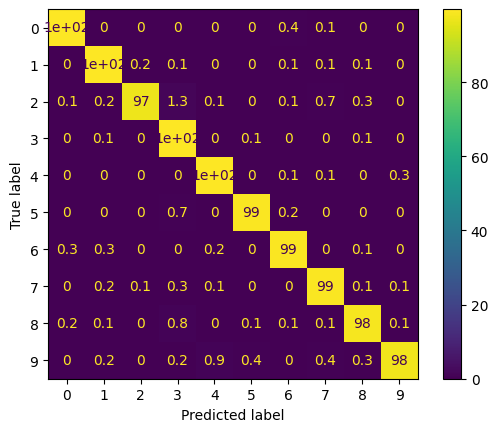

In [50]:
# matriz de confusion normalizada
cm_norm = np.round(100*cm/np.sum(cm,1),1)
show_cm_norm = ConfusionMatrixDisplay(confusion_matrix=cm_norm)
show_cm_norm.plot()

In [45]:
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       1.00      0.97      0.98      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [45]:
# CONTINUAR CRPETA 6